In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/automobile-customer.csv')

In [3]:
data.drop('CustomerID', axis=1, inplace=True)
data[['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore', 'Category', 'Segmentation']] = data[['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore', 'Category', 'Segmentation']].apply(LabelEncoder().fit_transform)
data.fillna(-1, inplace=True)

In [4]:
data.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,-1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,-1.0,1,6.0,5,0


In [30]:
X = data.drop(['Segmentation',], axis = 1)
y = data['Segmentation']

# X = X - (X.max(0)+X.min(0))/2
# X = X/X.max(axis=0)

In [31]:
# from tensorflow import keras
# from tensorflow.keras.layers import InputLayer, Dense
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras import backend as K
# from tensorflow.keras.losses import BinaryCrossentropy

# def Vanilla_AE(H=5):
#     model = Sequential()
#     model.add(InputLayer(input_shape=(9,)))
#     # model.add(Dense(7, activation='relu', use_bias=False))
#     model.add(Dense(H, activation='relu', use_bias=False, name='code_layer'))
#     # model.add(Dense(7, activation='relu', use_bias=False))
#     model.add(Dense(9, activation='tanh', use_bias=False))
#     model.compile(optimizer='adam', loss='mse')
#     return model

# ae = Vanilla_AE(H=7)
# ae.fit(X, X, shuffle=True, epochs=10, batch_size=20, verbose=1)

# inputs = ae.input
# outputs = ae.get_layer(name="code_layer").output
# encoder = Model(inputs=inputs, outputs=outputs)
# X_ = encoder.predict(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

[12:19:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.5187938868236266


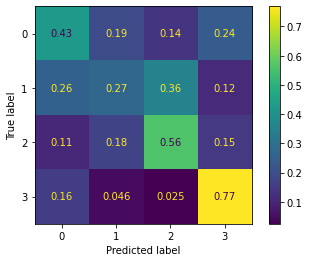

In [33]:
clf = XGBClassifier(learning_rate =0.05, max_depth=3, min_child_weight=4, gamma=0.2, subsample=0.6, objective= 'multi:softmax')
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

Accuracy:  0.49070631970260226


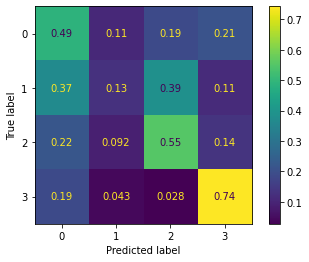

In [34]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
print("Accuracy: ", clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

Accuracy:  0.4919454770755886


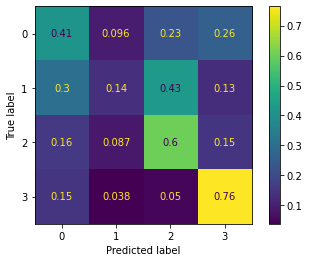

In [35]:
clf = LogisticRegression(C=1e5, solver = 'newton-cg', max_iter=200)
clf.fit(X_train,y_train)
print("Accuracy: ", clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

Accuracy:  0.9863692688971499


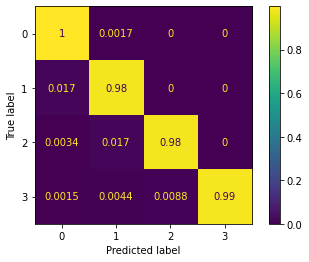

In [36]:
clf = KNeighborsClassifier(n_neighbors=5, weights="distance")
clf.fit(X_test, y_test)
print("Accuracy: ", clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

Accuracy:  0.9863692688971499


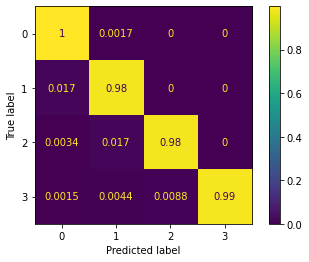

In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_test, y_test)
print("Accuracy: ", clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')